# AirQualityPy

In [186]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import numpy as np
import json
import time
import datetime
import matplotlib.dates as mdate
from config1 import api_key

### Air Quality Status for North Carolina

In [10]:
# Create the base url
url = "https://api.airvisual.com/v2/city?city="

# Create the city list for desired data
city = ["Raleigh", "Asheville", "Charlotte", "Wilmington", "New Bern", "Rocky Mount", "Fayetteville"] 

# Create an output list to hold request results
output = []

# Loop through the cities to perform requests
for c in city:
    query_url = url + c +"&state=North Carolina&country=USA&" + "&key=" + api_key  
    response = requests.get(query_url).json()
    
    # Put results to the output list
    output.append(response)

# Display the data
pprint(output)

[{'data': {'city': 'Raleigh',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 25,
                                     'aqius': 63,
                                     'maincn': 'p2',
                                     'mainus': 'p2',
                                     'ts': '2019-10-03T22:00:00.000Z'},
                       'weather': {'hu': 55,
                                   'ic': '01d',
                                   'pr': 1013,
                                   'tp': 33,
                                   'ts': '2019-10-03T22:00:00.000Z',
                                   'wd': 260,
                                   'ws': 2.38}},
           'location': {'coordinates': [-78.574203, 35.856098],
                        'type': 'Point'},
           'state': 'North Carolina'},
  'status': 'success'},
 {'data': {'city': 'Asheville',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 19,
                                  

In [106]:
# Create lists to hold necessary data
city_name = []
state = []
country_name = []
air_quality = []
main_pollutant = []
humidity = []
pressure = []
temperature = []
wind_speed = []
date = []

# Select the variables and put them in relative lists
for i in range(len(output)):
    city_name.append(output[i]["data"]["city"])
    state.append(output[i]["data"]["state"])
    country_name.append(output[i]["data"]["country"])
    air_quality.append(output[i]["data"]["current"]["pollution"]["aqius"])
    humidity.append(output[i]["data"]["current"]["weather"]["hu"])
    pressure.append(output[i]["data"]["current"]["weather"]["pr"])
    temperature.append(output[i]["data"]["current"]["weather"]["tp"])
    wind_speed.append(output[i]["data"]["current"]["weather"]["ws"])
    date.append(output[i]["data"]["current"]["pollution"]["ts"])
    main_pollutant.append(output[i]["data"]["current"]["pollution"]["mainus"])

In [107]:
# Create the dictionary to hold data
air_data = {"City": city_name,
             "State": state,
             "Country": country_name,
             "Air Quality": air_quality,
             "Main Pollutant": main_pollutant,
             "Humidity": humidity,
             "Pressure": pressure,
             "Temperature": temperature,
             "Wind Speed": wind_speed,
             "Date": date
           }
# Convert dictionary to a dataframe
air_df = pd.DataFrame(air_data)
air_df

,City,State,Country,Air Quality,Main Pollutant,Humidity,Pressure,Temperature,Wind Speed,Date
0,Raleigh,North Carolina,USA,63,p2,55,1013,33,2.38,2019-10-03T22:00:00.000Z
1,Asheville,North Carolina,USA,53,p2,45,1021,28,2.10,2019-10-03T20:00:00.000Z
2,Charlotte,North Carolina,USA,63,p2,28,1015,34,1.50,2019-10-03T22:00:00.000Z
3,Wilmington,North Carolina,USA,82,p2,74,1014,29,3.10,2019-10-03T22:00:00.000Z
4,New Bern,North Carolina,USA,34,p2,66,1014,29,4.60,2019-10-03T21:00:00.000Z
5,Rocky Mount,North Carolina,USA,64,p2,41,1013,33,3.10,2019-10-03T21:00:00.000Z
6,Fayetteville,North Carolina,USA,50,p2,32,1014,34,3.10,2019-10-03T19:00:00.000Z


In [176]:
# Check to data types
print(air_df.dtypes)

City               object
State              object
Country            object
Air Quality         int64
Main Pollutant     object
Humidity            int64
Pressure            int64
Temperature         int64
Wind Speed        float64
Date               object
dtype: object


In [177]:
# Convert date data type to datetime and select only date values
air_df["Date"] = pd.to_datetime(air_df["Date"])
air_df["Date"] = air_df["Date"].dt.date
# Display the data frame with new date values
air_df

,City,State,Country,Air Quality,Main Pollutant,Humidity,Pressure,Temperature,Wind Speed,Date
0,Raleigh,North Carolina,USA,63,p2,55,1013,33,2.38,2019-10-03
1,Asheville,North Carolina,USA,53,p2,45,1021,28,2.10,2019-10-03
2,Charlotte,North Carolina,USA,63,p2,28,1015,34,1.50,2019-10-03
3,Wilmington,North Carolina,USA,82,p2,74,1014,29,3.10,2019-10-03
4,New Bern,North Carolina,USA,34,p2,66,1014,29,4.60,2019-10-03
5,Rocky Mount,North Carolina,USA,64,p2,41,1013,33,3.10,2019-10-03
6,Fayetteville,North Carolina,USA,50,p2,32,1014,34,3.10,2019-10-03


### Air Quality Index Status for NC cities

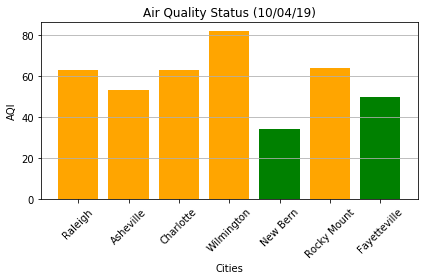

In [192]:
# Create a line chart to show air quality index change for each city
# Change the color depending on the air quality index
colors = ["green" if x <= 50 else "orange" if x <= 100 else "red" for x in air_df["Air Quality"]]
plt.bar(air_df["City"], air_df["Air Quality"], align="center", color = colors)

# Add labels 
plt.xticks(air_df["City"], rotation = 45)
plt.title("Air Quality Status (%s)" % time.strftime("%x"))
plt.ylabel("AQI")
plt.xlabel("Cities")
plt.grid(axis="y")

# Save the plot
plt.tight_layout()
plt.savefig("Output/air_quality.png")
plt.show()

### Air Quality, Humidity Relationship

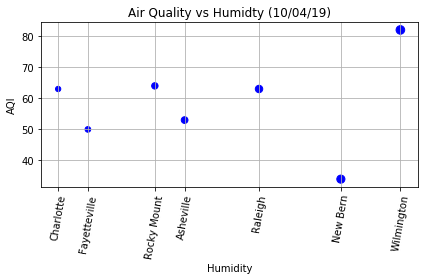

In [189]:
# Create the plot
plt.scatter(air_df["Humidity"], air_df["Air Quality"], marker = "o", color = "blue", s=air_df["Humidity"])

# Add Labels
plt.title("Air Quality vs Humidty (%s)" % time.strftime("%x"))
plt.xlabel("Humidity")
plt.ylabel("AQI")
tick_locations = air_df["Humidity"]
plt.xticks(tick_locations, air_df["City"], rotation=80)
plt.grid()

# Save the plot
plt.tight_layout()
plt.savefig("Output/aqi_humidity.png")
plt.show()

### Air Quality, Temperature Relationship

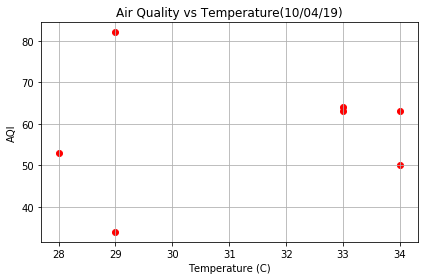

In [190]:
# Create plots for temprature and air quality 
plt.scatter(air_df["Temperature"], air_df["Air Quality"], marker="o", color = "red")

# Add Labels
plt.xlabel("Temperature (C)")
plt.ylabel("AQI")
plt.title("Air Quality vs Temperature(%s)" % time.strftime("%x"))
tick_locations = air_df["Temperature"]
plt.grid()

# Save the plot
plt.tight_layout()
plt.savefig("Output/aqi_temp.png")
plt.show()

### Air Quality,  Air Pressure Relationship


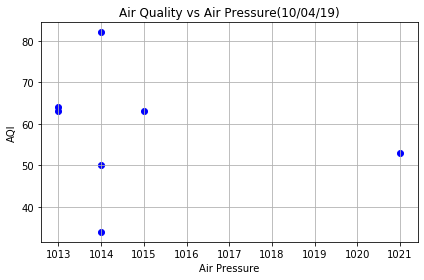

In [191]:
# Create plots for temprature and air quality 
plt.scatter(air_df["Pressure"], air_df["Air Quality"], marker="o", color = "blue")

# Add labels
plt.xlabel("Air Pressure")
plt.ylabel("AQI")
plt.title("Air Quality vs Air Pressure(%s)" % time.strftime("%x"))
tick_locations = air_df["Pressure"]
plt.grid()

# Save the plot
plt.tight_layout()
plt.savefig("Output/aqi_pressure.png")
plt.show()

### Air Quality Status for Cities Around The World

In [170]:
# Define a function to select cities around the world
def make_df(city_list):

    #We will be making a list of dictionaries that we will eventually turn into our dataframe
    dict_list = []

        #Loops through every city in the provided list. List format must be: [[city1, state1, country1], 
        #[city2, state2, country2]]. If it's a country without a state, just put the city name as the state in the list.
        #(Although some international cities have states.)
    for c in range(0, len(city_list)):

            #Locates the necessary info from the list.
        citi = city_list[c][0]
        state = city_list[c][1]
        country = city_list[c][2]


            #Builds our url.
        url = f"https://api.airvisual.com/v2/city?city={citi}&state={state}&country={country}&key="

            #Adds the api_key
        query_url = url + api_key

        #Pulls our response
        response = requests.get(query_url).json()

        #Only puts the state in the table if it's from the U.S.
        if country == 'USA':
            state = response['data']['state']
        else:
            state = 'N/A'

        #Pulls the necessary information (feel free to add or paramets)
        city = response['data']['city']
        country = response['data']['country']
        temperature = response['data']['current']['weather']['tp']
        air_qual = response['data']['current']['pollution']['aqius']
        humidity = response['data']['current']['weather']['hu']
        pressure = response['data']['current']['weather']['pr']
        wind_speed = response['data']['current']['weather']['ws']
        time = response['data']['current']['weather']['ts']
        main_pollutant = response["data"]["current"]["pollution"]["mainus"]
        

        #Takes all that information and puts it into a dictionary whcih we will then append to our dict_list.
        data_dict = {'City' : city,
                     'State' : state, 
                     'Country' : country, 
                     'Air Quality' : air_qual,
                     "Main Polutant": main_pollutant,
                     'Temperature' : temperature,
                     'Humidity': humidity, 
                     'Pressure' : pressure, 
                     'Wind Speed' : wind_speed, 
                     'Date' : time}
        dict_list.append(data_dict)

    #Turns our dict_list into a dataframe and returns it.
    dataframe = pd.DataFrame(dict_list)
    return dataframe

    #This is where our opportunity to loop into our cities.
    #Each city in the list must be formatted as [[city, state, country]]
city_list = [['Beijing', 'Beijing', 'China'], ['Asheville', 'North Carolina', 'USA'], ['Austin', 'Texas', 'USA'],
             ['Istanbul','Istanbul','Turkey']]
            
aqi_world_df = make_df(city_list)
aqi_world_df

,City,State,Country,Air Quality,Main Polutant,Temperature,Humidity,Pressure,Wind Speed,Date
0,Beijing,N/A,China,25,p2,12,81,1028,1.0,2019-10-04T16:00:00.000Z
1,Asheville,North Carolina,USA,53,p2,26,51,1022,3.6,2019-10-04T16:00:00.000Z
2,Austin,Texas,USA,72,p2,28,54,1020,2.1,2019-10-04T16:00:00.000Z
3,Istanbul,N/A,Turkey,57,p2,23,53,1007,4.6,2019-10-04T16:00:00.000Z


In [174]:
# Convert the date value to a datetime value and select only date values
aqi_world_df["Date"] = pd.to_datetime( aqi_world_df["Date"])
                                    
print(aqi_world_df.dtypes)                               

City                          object
State                         object
Country                       object
Air Quality                    int64
Main Polutant                 object
Temperature                    int64
Humidity                       int64
Pressure                       int64
Wind Speed                   float64
Date             datetime64[ns, UTC]
dtype: object


In [175]:
# Display the dataframe with new date values
aqi_world_df["Date"] = aqi_world_df["Date"].dt.date
aqi_world_df

,City,State,Country,Air Quality,Main Polutant,Temperature,Humidity,Pressure,Wind Speed,Date
0,Beijing,N/A,China,25,p2,12,81,1028,1.0,2019-10-04
1,Asheville,North Carolina,USA,53,p2,26,51,1022,3.6,2019-10-04
2,Austin,Texas,USA,72,p2,28,54,1020,2.1,2019-10-04
3,Istanbul,N/A,Turkey,57,p2,23,53,1007,4.6,2019-10-04
